In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

file_path = "Surgical_Cases_fm_3.3.csv" #"cleaned.csv"
df = pd.read_csv(file_path,sep=',')

# trueTestDF=df[df['ResultAfterSurgery'].isnull()]
# df.dropna(subset=['ResultAfterSurgery'], how='all',axis=0,inplace=True)




df.columns

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Index([u'Masked FIN', u'age', u'Sequence No.', u'SURG_PROCEDURE',
       u'Duration of Surgery (hh:mm).1', u'SURGICAL_SPECIALTY',
       u'Surgeon Hash Name', u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'SN - BM - PRBC Ordered',
       u'Allogeneic Blood Transfusion', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'ResultsBeforeSurgery',
       u'ResultAfterSurgery', u'EBL'],
      dtype='object')

In [2]:
df['SN - BM - PRBC Ordered']=df['SN - BM - PRBC Ordered'].fillna(0.0)

In [3]:
df=df.replace('.',0.0)

In [4]:
df['SN - BM - Pre-Op INR']=df['SN - BM - Pre-Op INR'].fillna(0.0)
df['SN - BM - Pre-Op Platelet Count']=df['SN - BM - Pre-Op Platelet Count'].fillna(0.0)

In [5]:
#age count is less since it has Nans which will be removed
df.describe()

,age,Sequence No.,SN - BM - PRBC Ordered,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,27196.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,19428.000000
mean,60.520702,14262.616416,1.269241,0.580626,0.340837,0.228373,0.766074,12.357422,11.177199
std,15.061706,8400.507829,3.482613,2.537552,2.042489,1.194519,4.938831,2.559800,2.035386
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107500,2.808300
25%,51.000000,6931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.802500,9.802900
50%,63.000000,14127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.804800,11.108800
75%,71.000000,21487.000000,2.052000,0.000000,0.000000,0.000000,0.000000,14.204900,12.603800
max,103.000000,29285.000000,414.601000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [6]:
#removing rows that have pre ordered blood 0 but the remaining four columns greater than 0
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].index,inplace=True)

(336, 19)


In [7]:
# columns that wont be necessary for predicting anemic status
del df['Masked FIN']
del df['Sequence No.']
del df['Duration of Surgery (hh:mm).1']
del df['SN - BM - PRBC Ordered']
del df['EBL']

In [8]:
# removing all rows with age Nan
print df[df['age'].isnull()].shape
df.drop(df[df['age'].isnull()].index,inplace=True)
df['ResultAfterSurgery']=df['ResultAfterSurgery'].fillna(0.0)

(21, 14)


In [9]:
df.describe()

,age,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000,26860.000000
mean,60.463738,0.537489,0.322581,0.219159,0.741284,12.375611,7.959865
std,15.076498,2.456286,1.989012,1.177527,4.887937,2.557242,5.353405
min,13.000000,0.000000,0.000000,0.000000,0.000000,3.107500,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,10.805475,0.000000
50%,63.000000,0.000000,0.000000,0.000000,0.000000,12.806200,10.103400
75%,71.000000,0.000000,0.000000,0.000000,0.000000,14.206000,12.002325
max,103.000000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [10]:
pd.isnull(df).any()

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool

In [11]:
df.dtypes

age                                float64
SURG_PROCEDURE                      object
SURGICAL_SPECIALTY                  object
Surgeon Hash Name                   object
PATIENT_TYPE                        object
SN - BM - Pre-Op INR                object
SN - BM - Pre-Op Platelet Count     object
Allogeneic Blood Transfusion        object
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultsBeforeSurgery               float64
ResultAfterSurgery                 float64
dtype: object

In [12]:
#converting to categorical variables
df['SURG_PROCEDURE']=df['SURG_PROCEDURE'].apply(lambda x: x.upper())
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')

df['SURGICAL_SPECIALTY']=df['SURGICAL_SPECIALTY'].apply(lambda x: x.upper())
df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')

df['PATIENT_TYPE']=df['PATIENT_TYPE'].apply(lambda x: x.upper())
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')

df['Allogeneic Blood Transfusion']=df['Allogeneic Blood Transfusion'].apply(lambda x: x.upper())
df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')

df['Surgeon Hash Name']=df['Surgeon Hash Name'].apply(lambda x: x.upper())
df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')

df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')
df['SN - BM - Red Blood Cells'] = df['SN - BM - Red Blood Cells'].astype('double')
df['SN - BM - Fresh Frozen Plasma'] = df['SN - BM - Fresh Frozen Plasma'].astype('double')
df['SN - BM - Platelets'] = df['SN - BM - Platelets'].astype('double')
df['SN - BM - Cryoprecipitate'] = df['SN - BM - Cryoprecipitate'].astype('double')

In [13]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultsBeforeSurgery                float64
ResultAfterSurgery                  float64
dtype: object

In [14]:
trueTestDF=df[df['ResultAfterSurgery']==0]
trueTestDF.head()
df=df.drop(trueTestDF.index)

In [15]:
trueTestDF.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,0.0,0.0,0.0,0.0,15.6063,0.0
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,0.0,0.0,0.0,0.0,14.5018,0.0
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,0.0,0.0,0.0,0.0,17.0057,0.0
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,0.0,0.0,0.0,0.0,13.3047,0.0
5,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,1.006,247.22,NO,0.0,0.0,0.0,0.0,16.1023,0.0


In [16]:
df.loc[:,'AnemimaStatusBeforeSurgery']=pd.Series('Severly Anemic',index=df[df['ResultsBeforeSurgery']<=8.0].index)
df.loc[[all([a, b]) for a,b in zip(df['ResultsBeforeSurgery']>8.0,df['ResultsBeforeSurgery']<=10.0)],['AnemimaStatusBeforeSurgery']]='Anemic'
df.loc[df['ResultsBeforeSurgery']>10.0,['AnemimaStatusBeforeSurgery']]='Not Anemic'



In [17]:
df.loc[:,'AnemimaStatusAfterSurgery']=pd.Series('Severly Anemic',index=df[df['ResultAfterSurgery']<=8.0].index)
df.loc[[all([a, b]) for a,b in zip(df['ResultAfterSurgery']>8.0,df['ResultAfterSurgery']<=10.0)],['AnemimaStatusAfterSurgery']]='Anemic'
df.loc[df['ResultAfterSurgery']>10.0,['AnemimaStatusAfterSurgery']]='Not Anemic'
del df['ResultAfterSurgery']
del df['ResultsBeforeSurgery']

In [18]:
# scaling the linear data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
cols=['SN - BM - Red Blood Cells','SN - BM - Fresh Frozen Plasma','SN - BM - Platelets','SN - BM - Cryoprecipitate']
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df[cols]),columns=cols,index=df.index)

In [19]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusBeforeSurgery,AnemimaStatusAfterSurgery
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,0.0000,0.0000,0.0000,0.000,Not Anemic,Not Anemic
7,58.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.000,370.19,NO,0.0000,0.0000,0.0000,0.000,Not Anemic,Not Anemic
9,89.0,AORTIC ABDOMINAL ANEURYSM ENDOVASCULAR R,VASCULAR SURGERY,DR. 223,INPATIENT,1.411,105.03,NO,0.0000,0.0000,0.0000,0.000,Not Anemic,Not Anemic
11,64.0,AORTIC ABDOMINAL ANEURYSM REPAIR,CARDIOTHORACIC SURGERY,DR. 167,INPATIENT,1.210,157.03,YES,4.0044,4.0004,4.0002,20.004,Not Anemic,Not Anemic
14,44.0,AORTIC AND MITRAL VALVE REPLACEMENT,CARDIOTHORACIC SURGERY,DR. 28,INPATIENT,0.000,0.00,YES,2.0024,0.0000,0.0000,0.000,Anemic,Anemic


In [20]:
df = df.drop(cols, axis=1)

In [21]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,AnemimaStatusAfterSurgery
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,Not Anemic,Not Anemic
7,58.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.000,370.19,NO,Not Anemic,Not Anemic
9,89.0,AORTIC ABDOMINAL ANEURYSM ENDOVASCULAR R,VASCULAR SURGERY,DR. 223,INPATIENT,1.411,105.03,NO,Not Anemic,Not Anemic
11,64.0,AORTIC ABDOMINAL ANEURYSM REPAIR,CARDIOTHORACIC SURGERY,DR. 167,INPATIENT,1.210,157.03,YES,Not Anemic,Not Anemic
14,44.0,AORTIC AND MITRAL VALVE REPLACEMENT,CARDIOTHORACIC SURGERY,DR. 28,INPATIENT,0.000,0.00,YES,Anemic,Anemic


In [22]:
targetDF=df['AnemimaStatusAfterSurgery']
df=df.ix[:,:-1]
df = df.join(df_scaled)
df= df.join(targetDF)
# targetDF

4            Not Anemic
7            Not Anemic
9            Not Anemic
11           Not Anemic
14               Anemic
15               Anemic
16       Severly Anemic
17               Anemic
18           Not Anemic
19               Anemic
20           Not Anemic
21           Not Anemic
22       Severly Anemic
23           Not Anemic
24           Not Anemic
26           Not Anemic
28               Anemic
29           Not Anemic
30           Not Anemic
31           Not Anemic
36           Not Anemic
37               Anemic
38           Not Anemic
39       Severly Anemic
40           Not Anemic
41           Not Anemic
42           Not Anemic
43       Severly Anemic
44       Severly Anemic
45           Not Anemic
              ...      
27154        Not Anemic
27156        Not Anemic
27161        Not Anemic
27162        Not Anemic
27168        Not Anemic
27170        Not Anemic
27181        Not Anemic
27182        Not Anemic
27187            Anemic
27193        Not Anemic
27194           

In [23]:
df.describe()

,age,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate
count,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000
mean,61.231695,1.028847,219.497271,0.008636,0.006745,0.004499,0.007033
std,14.689218,5.317076,859.998740,0.036448,0.038304,0.022204,0.042615
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.904000,153.120000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.004000,217.150000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,1.009000,276.080000,0.000000,0.000000,0.000000,0.000000
max,103.000000,299.100000,108032.460000,1.000000,1.000000,1.000000,1.000000


In [24]:

print pd.isnull(df).any()
df.dtypes

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
AnemimaStatusBeforeSurgery         False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
AnemimaStatusAfterSurgery          False
dtype: bool


age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
AnemimaStatusBeforeSurgery           object
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
AnemimaStatusAfterSurgery            object
dtype: object

In [25]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,INPATIENT,0.000,0.00,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
7,58.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.000,370.19,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
9,89.0,AORTIC ABDOMINAL ANEURYSM ENDOVASCULAR R,VASCULAR SURGERY,DR. 223,INPATIENT,1.411,105.03,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
11,64.0,AORTIC ABDOMINAL ANEURYSM REPAIR,CARDIOTHORACIC SURGERY,DR. 167,INPATIENT,1.210,157.03,YES,Not Anemic,0.055548,0.072729,0.070172,0.159972,Not Anemic
14,44.0,AORTIC AND MITRAL VALVE REPLACEMENT,CARDIOTHORACIC SURGERY,DR. 28,INPATIENT,0.000,0.00,YES,Anemic,0.027777,0.000000,0.000000,0.000000,Anemic


In [26]:
grouped = df.groupby('SURGICAL_SPECIALTY')
print grouped.size()
print grouped.mean()

SURGICAL_SPECIALTY
ANESTHESIOLOGY                11
CARDIOLOGY                     9
CARDIOTHORACIC SURGERY      1722
COLORECTAL SURGERY           842
CRITICAL CARE-TRAUMA          77
ENT                         1650
GASTROENTEROLOGY              13
GENERAL SURGERY             1415
INTERVENTIONAL RADIOLOGY       3
MISSING SPECIALTY              0
NEUROLOGY                      0
NEUROSURGERY                 956
OBGYN                        693
OMFS                           6
OPTHALMOLOGY                  10
ORTHOPAEDIC SURGERY         2665
OTHER                          1
PLASTIC SURGERY              726
PULMONOLOGY                    3
SPINE SURGERY               1236
SURGICAL ONCOLOGY            253
THORACIC SURGERY            1052
TRANSPLANTHEPATOBILIARY     1464
TRANSPLANTUROLOGY            108
UROLOGY                     3171
VASCULAR SURGERY            1021
dtype: int64
                                age  SN - BM - Pre-Op INR  \
SURGICAL_SPECIALTY                               

In [27]:
df.columns

Index([u'age', u'SURG_PROCEDURE', u'SURGICAL_SPECIALTY', u'Surgeon Hash Name',
       u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'Allogeneic Blood Transfusion',
       u'AnemimaStatusBeforeSurgery', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'AnemimaStatusAfterSurgery'],
      dtype='object')

In [28]:
grouped = df.groupby('PATIENT_TYPE')
print grouped.size()

PATIENT_TYPE
DAY SURGERY             2445
EXTENDED RECOVERY        269
INPATIENT              15934
NON PATIENT                0
OBSERVATION              346
OUTPATIENT                28
OUTPATIENT IN A BED       84
PREADMIT                   1
dtype: int64


In [29]:
# del df['SURG_PROCEDURE']
del df['Surgeon Hash Name']

In [30]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
4,56.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,INPATIENT,0.000,0.00,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
7,58.0,ANAL MASS EXCISION,COLORECTAL SURGERY,DAY SURGERY,0.000,370.19,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
9,89.0,AORTIC ABDOMINAL ANEURYSM ENDOVASCULAR R,VASCULAR SURGERY,INPATIENT,1.411,105.03,NO,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
11,64.0,AORTIC ABDOMINAL ANEURYSM REPAIR,CARDIOTHORACIC SURGERY,INPATIENT,1.210,157.03,YES,Not Anemic,0.055548,0.072729,0.070172,0.159972,Not Anemic
14,44.0,AORTIC AND MITRAL VALVE REPLACEMENT,CARDIOTHORACIC SURGERY,INPATIENT,0.000,0.00,YES,Anemic,0.027777,0.000000,0.000000,0.000000,Anemic


In [60]:
cat_columns = df.select_dtypes(['category']).columns
print cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

Index([u'SURGICAL_SPECIALTY', u'PATIENT_TYPE', u'Allogeneic Blood Transfusion',
       u'AnemimaStatusBeforeSurgery', u'AnemimaStatusAfterSurgery'],
      dtype='object')


,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
4,56.0,13,3,2,0.000,0.00,0,1,0.000000,0.000000,0.000000,0.000000,1
7,58.0,14,3,0,0.000,370.19,0,1,0.000000,0.000000,0.000000,0.000000,1
9,89.0,21,23,2,1.411,105.03,0,1,0.000000,0.000000,0.000000,0.000000,1
11,64.0,22,2,2,1.210,157.03,1,1,0.055548,0.072729,0.070172,0.159972,1
14,44.0,23,2,2,0.000,0.00,1,0,0.027777,0.000000,0.000000,0.000000,0


In [61]:
df.dtypes

age                                float64
SURG_PROCEDURE                       int16
SURGICAL_SPECIALTY                    int8
PATIENT_TYPE                          int8
SN - BM - Pre-Op INR               float64
SN - BM - Pre-Op Platelet Count    float64
Allogeneic Blood Transfusion          int8
AnemimaStatusBeforeSurgery            int8
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
AnemimaStatusAfterSurgery             int8
dtype: object

In [44]:
#converting to categorical variables
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes

df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
# df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
# df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes

df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
# df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes

df['AnemimaStatusAfterSurgery'] = df['AnemimaStatusAfterSurgery'].astype('category')

df['AnemimaStatusBeforeSurgery'] = df['AnemimaStatusBeforeSurgery'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].astype('category')
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].cat.codes
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].astype('category')
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].cat.codes

# df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
# df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')

In [45]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
4,56.0,13,3,2,0.000,0.00,0,1,0.000000,0.000000,0.000000,0.000000,1
7,58.0,14,3,0,0.000,370.19,0,1,0.000000,0.000000,0.000000,0.000000,1
9,89.0,21,23,2,1.411,105.03,0,1,0.000000,0.000000,0.000000,0.000000,1
11,64.0,22,2,2,1.210,157.03,1,1,0.055548,0.072729,0.070172,0.159972,1
14,44.0,23,2,2,0.000,0.00,1,0,0.027777,0.000000,0.000000,0.000000,0


In [119]:
df.head()

,Masked_FIN,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon_Hash_Name,PATIENT_TYPE,SN_BM_Pre_Op_INR,SN_BM_Pre_Op_Platelet_Count,SN_BM_PRBC_Ordered,Allogeneic_Blood_Transfusion,SN_BM_Red_Blood_Cells,SN_BM_Fresh_Frozen_Plasma,SN_BM_Platelets,SN_BM_Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
4,A7660,56.0,13,4,70,2,0,0,0.000,0,0.0000,0.0000,0.0000,0.000,11.6062,10.2062
9,A12885,89.0,20,26,57,2,1.411,105.03,4.056,0,0.0000,0.0000,0.0000,0.000,10.1029,12.7029
11,A2517,64.0,21,2,33,2,1.21,157.03,6.085,1,4.0044,4.0004,4.0002,20.004,10.6070,14.6070
15,A17211,85.0,32,3,43,2,1.104,210.08,4.147,1,3.0028,3.0001,3.0005,0.000,10.5029,9.8029
16,A15290,78.0,32,3,43,2,1.004,167.07,6.140,0,0.0000,0.0000,0.0000,0.000,5.3081,7.8081


In [ ]:
# del df['PATIENT_TYPE']

In [ ]:
# trueTestDF=df[df['ResultAfterSurgery']==0]
# trueTestDF.head()
# df=df.drop(trueTestDF.index)

In [35]:
df.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
4,56.0,13,3,2,0.000,0.00,0,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
7,58.0,14,3,0,0.000,370.19,0,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
9,89.0,21,25,2,1.411,105.03,0,Not Anemic,0.000000,0.000000,0.000000,0.000000,Not Anemic
11,64.0,22,2,2,1.210,157.03,1,Not Anemic,0.055548,0.072729,0.070172,0.159972,Not Anemic
14,44.0,23,2,2,0.000,0.00,1,Anemic,0.027777,0.000000,0.000000,0.000000,Anemic


In [36]:
trueTestDF.head()

,age,SURG_PROCEDURE,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
0,36.0,ACHILLES TENDON REPAIR,ORTHOPAEDIC SURGERY,DR. 281,DAY SURGERY,0.000,0.00,NO,0.0,0.0,0.0,0.0,15.6063,0.0
1,48.0,ANAL CONDYLOMA EXCISION,COLORECTAL SURGERY,DR. 236,OBSERVATION,0.000,0.00,NO,0.0,0.0,0.0,0.0,14.5018,0.0
2,25.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,0.904,288.09,NO,0.0,0.0,0.0,0.0,17.0057,0.0
3,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 236,DAY SURGERY,0.000,0.00,NO,0.0,0.0,0.0,0.0,13.3047,0.0
5,29.0,ANAL FISTULOTOMY WITH SETON,COLORECTAL SURGERY,DR. 25,DAY SURGERY,1.006,247.22,NO,0.0,0.0,0.0,0.0,16.1023,0.0


In [132]:
df.ix[:,1:].to_csv("input.csv",index=False)

In [133]:
pd.read_csv("input.csv").isnull().any()

age                             False
SURG_PROCEDURE                  False
SURGICAL_SPECIALTY              False
Surgeon_Hash_Name               False
PATIENT_TYPE                    False
SN_BM_Pre_Op_INR                False
SN_BM_Pre_Op_Platelet_Count     False
SN_BM_PRBC_Ordered              False
Allogeneic_Blood_Transfusion    False
SN_BM_Red_Blood_Cells           False
SN_BM_Fresh_Frozen_Plasma       False
SN_BM_Platelets                 False
SN_BM_Cryoprecipitate           False
ResultsBeforeSurgery            False
ResultAfterSurgery              False
dtype: bool

In [128]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:-1],
                                                    df.ix[:,-1],
                                                    test_size=0.2,
                                                    random_state=0)

In [131]:
X_train.join(y_train).to_csv("input.csv",index=False)

In [62]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:-1],
                                                    df.ix[:,-1],
                                                    test_size=0.2,
                                                    random_state=0)

In [126]:
X_train.join(y_train)

,SURG_PROCEDURE,SURGICAL_SPECIALTY,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,Allogeneic Blood Transfusion,AnemimaStatusBeforeSurgery,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,AnemimaStatusAfterSurgery
14494,158,9,2,0.906,316.13,0,1,0.000000,0.000000,0.000000,0.000000,1
8996,423,7,0,1.006,209.19,0,1,0.000000,0.000000,0.000000,0.000000,1
15118,73,15,2,0.905,245.17,0,1,0.000000,0.000000,0.000000,0.000000,0
8039,281,7,3,0.905,221.09,0,1,0.000000,0.000000,0.000000,0.000000,1
24220,223,7,0,1.008,316.03,0,1,0.000000,0.000000,0.000000,0.000000,1
26082,470,2,2,1.001,225.05,0,2,0.000000,0.000000,0.000000,0.000000,0
17742,417,13,2,1.064,145.01,0,1,0.000000,0.000000,0.000000,0.000000,0
15017,611,3,2,0.902,191.13,0,1,0.000000,0.000000,0.000000,0.000000,1
16547,601,22,2,0.906,258.10,0,1,0.000000,0.000000,0.000000,0.000000,1
16736,339,13,2,1.001,252.10,0,1,0.000000,0.000000,0.000000,0.000000,0


In [63]:
print(X_train.shape)
print(X_test.shape)
print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))

(15285, 11)
(3822, 11)
Training/Test Ratio: 3


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
param_grid = {
                 'n_estimators': range(10,100,10)
#                  'max_depth': range(2,20,2)
             }
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.72542, std: 0.00560, params: {'n_estimators': 10},
  mean: 0.73464, std: 0.01091, params: {'n_estimators': 20},
  mean: 0.73660, std: 0.01114, params: {'n_estimators': 30},
  mean: 0.73968, std: 0.00773, params: {'n_estimators': 40},
  mean: 0.74249, std: 0.00916, params: {'n_estimators': 50},
  mean: 0.74360, std: 0.00821, params: {'n_estimators': 60},
  mean: 0.74779, std: 0.01063, params: {'n_estimators': 70},
  mean: 0.74504, std: 0.00874, params: {'n_estimators': 80},
  mean: 0.74511, std: 0.01085, params: {'n_estimators': 90}],
 {'n_estimators': 70},
 0.74779195289499512)

       True  Predicted
0         1          1
1         0          1
2         1          0
3         0          1
4         1          0
5         1          0
6         1          1
7         2          1
8         0          2
9         1          1
10        1          1
11        1          1
12        1          1
13        1          1
14        1          1
15        1          1
16        1          0
17        1          1
18        0          0
19        1          1
20        1          0
21        1          1
22        1          1
23        2          1
24        1          1
25        0          1
26        1          1
27        1          0
28        1          2
29        1          0
...     ...        ...
15255     1          1
15256     0          1
15257     1          0
15258     1          1
15259     0          1
15260     1          0
15261     0          1
15262     1          1
15263     1          1
15264     0          1
15265     1          1
15266     1

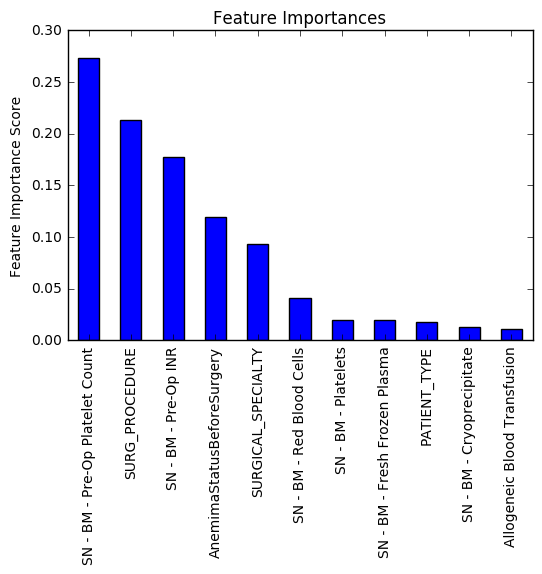

In [99]:
predictors = X_train.columns
modelfit(grid_clf.estimator,X_train,predictors,y_train)

In [100]:
param_grid2 = {
                 'max_depth':range(5,16,2), 'min_samples_split':range(100,2001,200)
             }
grid_clf2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70), param_grid=param_grid2, cv=10)
grid_clf2.fit(X_train, y_train)
grid_clf2.grid_scores_, grid_clf2.best_params_, grid_clf2.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.75407, std: 0.00637, params: {'min_samples_split': 100, 'max_depth': 5},
  mean: 0.75185, std: 0.00810, params: {'min_samples_split': 300, 'max_depth': 5},
  mean: 0.75074, std: 0.00736, params: {'min_samples_split': 500, 'max_depth': 5},
  mean: 0.75021, std: 0.00817, params: {'min_samples_split': 700, 'max_depth': 5},
  mean: 0.74910, std: 0.00745, params: {'min_samples_split': 900, 'max_depth': 5},
  mean: 0.74766, std: 0.00841, params: {'min_samples_split': 1100, 'max_depth': 5},
  mean: 0.74884, std: 0.00672, params: {'min_samples_split': 1300, 'max_depth': 5},
  mean: 0.74792, std: 0.00820, params: {'min_samples_split': 1500, 'max_depth': 5},
  mean: 0.74766, std: 0.00800, params: {'min_samples_split': 1700, 'max_depth': 5},
  mean: 0.74818, std: 0.00840, params: {'min_samples_split': 1900, 'max_depth': 5},
  mean: 0.75440, std: 0.00852, params: {'min_samples_split': 100, 'max_depth': 7},
  mean: 0.75361, std: 0.00632, params: {'min_samples_split': 300, 'max_depth': 7},

       True  Predicted
0         1          1
1         0          1
2         1          0
3         0          1
4         1          0
5         1          0
6         1          1
7         2          1
8         0          2
9         1          1
10        1          1
11        1          1
12        1          1
13        1          1
14        1          1
15        1          1
16        1          0
17        1          1
18        0          0
19        1          1
20        1          0
21        1          1
22        1          1
23        2          1
24        1          1
25        0          1
26        1          1
27        1          0
28        1          2
29        1          0
...     ...        ...
15255     0          1
15256     0          1
15257     1          0
15258     1          1
15259     0          1
15260     1          0
15261     0          1
15262     1          1
15263     1          1
15264     0          1
15265     1          1
15266     1

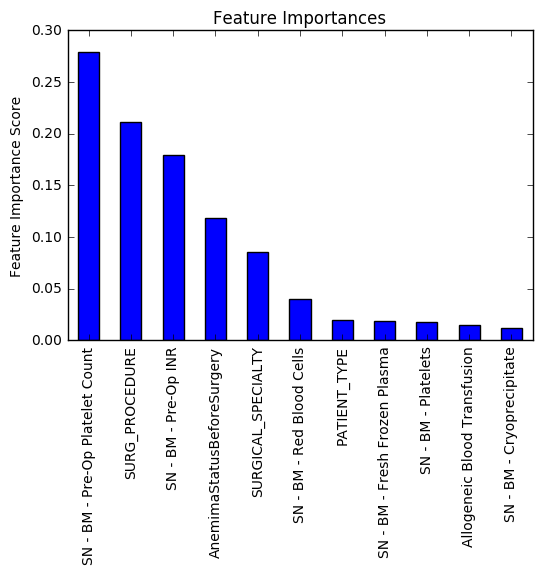

In [101]:
predictors = X_train.columns
modelfit(grid_clf2.estimator,X_train,predictors,y_train)

In [139]:
predictors = X_train.columns
modelfit(grid_clf2.estimator,X_train,predictors,y_train)

ValueError: Unknown label type: 'continuous'

In [138]:
X_train[predictors]

KeyError: "Index([u'SN - BM - Pre-Op INR', u'SN - BM - Pre-Op Platelet Count',\n       u'Allogeneic Blood Transfusion', u'AnemimaStatusBeforeSurgery',\n       u'SN - BM - Red Blood Cells', u'SN - BM - Fresh Frozen Plasma',\n       u'SN - BM - Platelets', u'SN - BM - Cryoprecipitate'],\n      dtype='object') not in index"

In [113]:
param_grid3 = {'min_samples_split':range(2,10,1), 'min_samples_leaf':range(1,10,1)}
grid_clf3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70,max_depth=13, min_samples_split=100), param_grid=param_grid3, cv=10)
grid_clf3.fit(X_train, y_train)
grid_clf3.grid_scores_, grid_clf3.best_params_, grid_clf3.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.75990, std: 0.01029, params: {'min_samples_split': 2, 'min_samples_leaf': 1},
  mean: 0.75931, std: 0.00980, params: {'min_samples_split': 3, 'min_samples_leaf': 1},
  mean: 0.76022, std: 0.00837, params: {'min_samples_split': 4, 'min_samples_leaf': 1},
  mean: 0.76147, std: 0.00901, params: {'min_samples_split': 5, 'min_samples_leaf': 1},
  mean: 0.76153, std: 0.00979, params: {'min_samples_split': 6, 'min_samples_leaf': 1},
  mean: 0.75924, std: 0.00925, params: {'min_samples_split': 7, 'min_samples_leaf': 1},
  mean: 0.75976, std: 0.00966, params: {'min_samples_split': 8, 'min_samples_leaf': 1},
  mean: 0.75846, std: 0.00802, params: {'min_samples_split': 9, 'min_samples_leaf': 1},
  mean: 0.76035, std: 0.00749, params: {'min_samples_split': 2, 'min_samples_leaf': 2},
  mean: 0.75931, std: 0.00943, params: {'min_samples_split': 3, 'min_samples_leaf': 2},
  mean: 0.76035, std: 0.00992, params: {'min_samples_split': 4, 'min_samples_leaf': 2},
  mean: 0.75983, std: 0.00744, p

       True  Predicted
0         1          1
1         0          1
2         1          0
3         0          1
4         1          0
5         1          0
6         1          1
7         2          1
8         0          2
9         1          1
10        1          1
11        1          1
12        1          1
13        1          1
14        1          1
15        1          1
16        1          0
17        1          1
18        0          0
19        1          1
20        1          0
21        1          1
22        1          1
23        2          1
24        1          1
25        0          1
26        1          1
27        1          0
28        1          2
29        1          0
...     ...        ...
15255     1          1
15256     1          1
15257     0          1
15258     1          1
15259     1          1
15260     1          0
15261     1          1
15262     1          1
15263     1          1
15264     1          1
15265     1          1
15266     1

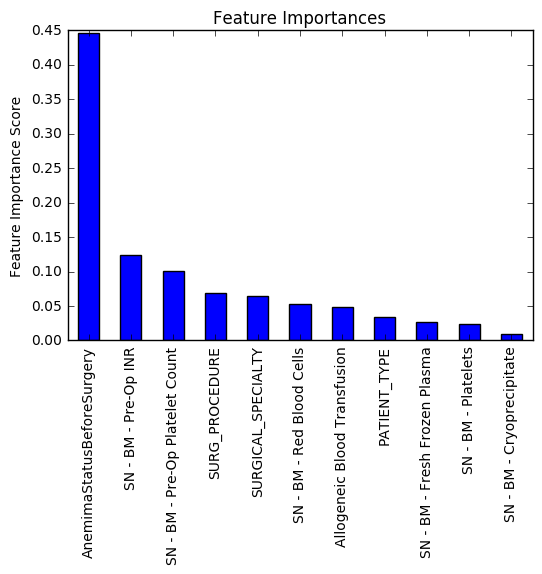

In [114]:
predictors = X_train.columns
modelfit(grid_clf3.estimator,X_train,predictors,y_train)

In [115]:
param_grid3 = {'max_features':range(3,9,1)}
grid_clf4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=70,max_depth=13, min_samples_split=100), param_grid=param_grid3, cv=10)
grid_clf4.fit(X_train,y_train)
grid_clf4.grid_scores_, grid_clf4.best_params_, grid_clf4.best_score_

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.75453, std: 0.00666, params: {'max_features': 3},
  mean: 0.75525, std: 0.00642, params: {'max_features': 4},
  mean: 0.75473, std: 0.00665, params: {'max_features': 5},
  mean: 0.75512, std: 0.00564, params: {'max_features': 6},
  mean: 0.75512, std: 0.00684, params: {'max_features': 7},
  mean: 0.75375, std: 0.00712, params: {'max_features': 8}],
 {'max_features': 4},
 0.75525024533856722)

In [118]:


import numpy
import pandas as pd


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
file_path = "Surgical_Cases_fm_3.3.csv"
# create some random data; replace that by your actual dataset
df = pd.read_csv(file_path,sep=',')

trueTestDF=df[df['ResultAfterSurgery'].isnull()]


df.dropna(subset=['ResultAfterSurgery'], how='all',axis=0,inplace=True)

del df['Sequence No.']
del df['Duration of Surgery (hh:mm).1']
del df['EBL']
# targetDF=df['ResultAfterSurgery']
# df=df.ix[:,:-1]


df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes
df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes
df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes
df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes

df=df.replace('.',0.0)
df=df.replace('NaN',0.0)
df['SN - BM - Pre-Op INR']=df['SN - BM - Pre-Op INR'].fillna(0.0)
df['SN - BM - Pre-Op Platelet Count']=df['SN - BM - Pre-Op Platelet Count'].fillna(0.0)
df.drop(df[df['SN - BM - Pre-Op Platelet Count'] == 0].index,inplace=True)
df.drop(df[df['SN - BM - Pre-Op INR'] == 0].index,inplace=True)



df = df.rename(columns={'Allogeneic Blood Transfusion':'Allogeneic_Blood_Transfusion','Masked FIN':'Masked_FIN',\
'Surgeon Hash Name':'Surgeon_Hash_Name','SN - BM - Pre-Op INR':'SN_BM_Pre_Op_INR',\
'SN - BM - Pre-Op Platelet Count':'SN_BM_Pre_Op_Platelet_Count','SN - BM - PRBC Ordered':'SN_BM_PRBC_Ordered',\
'SN - BM - Red Blood Cells':'SN_BM_Red_Blood_Cells','SN - BM - Fresh Frozen Plasma':'SN_BM_Fresh_Frozen_Plasma',\
'SN - BM - Platelets':'SN_BM_Platelets','SN - BM - Cryoprecipitate':'SN_BM_Cryoprecipitate'})

from sklearn import cross_validation
X, test_data, Y, test_labels = cross_validation.train_test_split(df.ix[:,1:-1],df.ix[:,-1],test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(Y)
Y = scaler.transform(Y)
scaler.fit(test_data)
test_data = scaler.transform(test_data)
scaler.fit(test_labels)
test_labels = scaler.transform(test_labels)
from sklearn import linear_model

clf = linear_model.SGDRegressor()
clf.fit(X,Y)

# clf is a trained model

y_predicted = clf.predict(test_data)
print metrics.mean_squared_error(test_labels, y_predicted)
c=pd.DataFrame(np.concatenate(([np.array(test_labels)],[np.array(y_predicted)]),axis=0).reshape(len(y_predicted),2),columns=['True','Predicted'])
print c


0.739189142499
          True  Predicted
0     1.738711  -1.277557
1    -0.287662  -0.632874
2    -0.190393   0.503888
3     1.788754   0.700651
4     1.196093  -0.140548
5     1.194807  -1.028279
6    -0.634902  -2.561138
7     0.306285   0.897957
8    -1.225585   0.207928
9     0.057204   1.988435
10   -0.486996   1.345284
11    1.196489  -0.586539
12    1.691288  -0.288799
13   -0.385326  -1.079410
14    0.208472  -0.780384
15    0.256489   1.394586
16   -0.433788  -0.088229
17   -0.434183  -1.425463
18   -1.176184  -0.434332
19    0.008545  -1.225832
20    0.059775   0.058490
21    0.304851  -0.288107
22    0.899639   1.344889
23    1.592338  -1.373540
24   -0.140943   0.255945
25   -0.683956   1.788260
26   -1.127624   0.059578
27    1.840529   0.008644
28   -0.833148  -0.586539
29   -0.039867  -0.633023
...        ...        ...
3281  0.759698  -0.513651
3282 -0.889559   0.473612
3283  0.106832  -0.426823
3284 -0.806467  -0.221292
3285 -0.208930   0.762187
3286 -0.295863   0.0574

//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X

In [92]:
def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    c=pd.DataFrame(np.concatenate(([np.array(target)],[np.array(dtrain_predictions)]),axis=0).reshape(len(dtrain_predictions),2),columns=['True','Predicted'])
    print c
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], target, cv=cv_folds, scoring='accuracy')
    
    #Print model report:
    print "\nModel Report"
    print "Precision : %.4g" % metrics.precision_score(target, dtrain_predictions,average='macro')
    print "Recall : %.4g" % metrics.recall_score(target, dtrain_predictions,average='macro')
    print "Confusion Matrix" 
    print metrics.confusion_matrix(target, dtrain_predictions)
#     print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()

In [ ]:
predictors = X_train.columns
gbm0 = ensemble.GradientBoostingRegressor(random_state=10)
modelfit(gbm0, X_train, predictors, y_train)

In [ ]:
param_test1 = {'n_estimators':range(1000,2000,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, min_samples_split=600,min_samples_leaf=50,max_depth=8,max_features='auto',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,2001,200)}
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.1, n_estimators=950, max_features='auto', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=950,max_depth=5,max_features='auto', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[predictors],y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
modelfit(gsearch3.best_estimator_, X_train, predictors,y_train)

In [ ]:
X_train.columns

In [ ]:
param_test4 = {'max_features':range(3,9,1)}
gsearch4 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=950,max_depth=5, min_samples_split=1000, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[predictors],y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
modelfit(gsearch4.best_estimator_, X_train, predictors,y_train)

In [ ]:
pred=gsearch4.best_estimator_.predict(X_test)
c=pd.DataFrame(np.concatenate(([np.array(y_test)],[np.array(pred)]),axis=0).reshape(len(pred),2),columns=['True','Predicted'])
print metrics.r2_score(y_test,pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = LinearRegression()
grid = GridSearchCV(model,parameters)
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "Grid best score: ", grid.best_score_
print "Grid score function: ", grid.score(X_test,y_test)
print metrics.r2_score(y_test,predictions)

In [ ]:
y_train.isnull().any()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_test1 = {'hidden_layer_sizes':range(50,2000,100)}
mlpsearch1 = GridSearchCV(estimator = MLPRegressor(learning_rate='adaptive',random_state=10,activation='relu'), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
mlpsearch1.fit(X_train[predictors],y_train)
mlpsearch1.grid_scores_, mlpsearch1.best_params_, mlpsearch1.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_test1 = {'hidden_layer_sizes':range(50,2000,50)}
mlpsearch1 = GridSearchCV(estimator = MLPRegressor(learning_rate='constant',random_state=10,activation='relu'), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
mlpsearch1.fit(X_train[predictors],y_train)
mlpsearch1.grid_scores_, mlpsearch1.best_params_, mlpsearch1.best_score_

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
metrics.r2_score(y_test,pred)

In [ ]:
import pandas as pd
from sklearn.grid_search import GridSearchCV

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': np.min(scores),
                 'max_score': np.max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series(dict(params.items() + d.items()))

        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                     for k in self.keys
                     for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models2 = { 
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(), 
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

params2 = { 
    'LinearRegression': { },
    'Ridge': { 'alpha': [0.1, 1.0] },
    'Lasso': { 'alpha': [0.1, 1.0] },
    'GradientBoostingRegressor': {'n_estimators': [100,200,300,400,500], 'learning_rate': [0.1, 1.0],'max_depth':[5,10], 'min_samples_split':[500,1000], 'min_samples_leaf': [25,50,100], 'subsample':[0.8]}
}


In [ ]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X_train, y_train, n_jobs=-1,scoring="neg_mean_squared_error")

In [ ]:
helper2.score_summary()
